In [35]:
import json
path_to_results = '../julia_scripts/sigma_4y.txt'

f = open(path_to_results, 'r')

big_dict = []

params_flag = 0
skip_next_count = 0
bif_count = 0
point_count = 0
point_line = 0
param_dict = {}
point_dict = {}

t_point = 0

for line in f:
    line = line.strip()
    if line == 'Params:' or line == '-------':
        params_flag = 1

    elif params_flag == 1:
        if line == 'Result:':
            params_flag = 2
            skip_next_count = 1
            continue
        k, v = line.split('#')
        k = k[1:]
        param_dict[k] = float(v)
    
    elif params_flag == 2:
        if skip_next_count:
            skip_next_count -= 1
        else:
            if line[:20] == " ├─ Number of points":
                point_count = int(line[21:])
                skip_next_count = 8
            elif line[:3] == "- #":
                params_flag = 3
                bif_count += 1
    elif params_flag == 3:
        if line[:3] == "- #":
            bif_count += 1
        else:
            bif_count -= 2
            params_flag = 4
    elif params_flag == 4:
        if point_line == point_count:
            params_flag = 5
        else:
            line = line.strip('()')
            items = line.split(',')
            point_dict[point_line] = {}
            for item in items:
                try:
                    k, v = item.split('=')
                except Exception as e:
                    point_dict[point_line][k.strip(' ')] = point_dict[point_line][k.strip(' ')] + item
                point_dict[point_line][k.strip(' ')] = v.strip(' ')
            point_line += 1

    elif params_flag == 5:
        big_dict.append({})
        big_dict[t_point]['bif_count'] = bif_count
        big_dict[t_point]['point_dict'] = point_dict 
        big_dict[t_point]['param_dict'] = param_dict

        params_flag = 0
        skip_next_count = 0
        bif_count = 0
        point_count = 0
        point_line = 0
        param_dict = {}
        point_dict = {}

        t_point += 1


In [36]:
big_dict

[{'bif_count': 0,
  'point_dict': {},
  'param_dict': {'r': 0.0015199999999999999,
   'c': -0.00848,
   's': 3097.74,
   'σ': 12.504384271718989}},
 {'bif_count': 0,
  'point_dict': {},
  'param_dict': {'r': 0.00155,
   'c': -0.008450000000000001,
   's': 3117.86,
   'σ': 15.0332801777824}},
 {'bif_count': 0,
  'point_dict': {},
  'param_dict': {'r': 0.00155,
   'c': -0.008450000000000001,
   's': 3131.29,
   'σ': 16.262187022638116}},
 {'bif_count': 0,
  'point_dict': {},
  'param_dict': {'r': 0.00147,
   'c': -0.00853,
   's': 3050.33,
   'σ': 0.38425780312083746}},
 {'bif_count': 0,
  'point_dict': {},
  'param_dict': {'r': 0.00145,
   'c': -0.00855,
   's': 3083.76,
   'σ': 4.882520593725084}},
 {'bif_count': 0,
  'point_dict': {},
  'param_dict': {'r': 0.0015199999999999999,
   'c': -0.00848,
   's': 3009.05,
   'σ': 9.710329789761241}},
 {'bif_count': 0,
  'point_dict': {},
  'param_dict': {'r': 0.0014000000000000002,
   'c': -0.0086,
   's': 3053.24,
   'σ': 2.795880223816136}},

In [37]:
big_dict = big_dict[:-300]

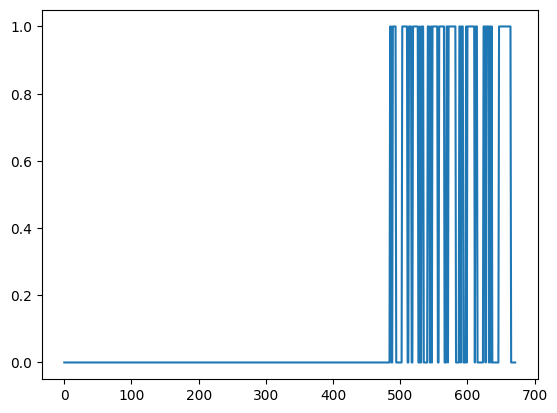

In [38]:
import matplotlib.pyplot as plt

bif_data = []
bif_indexes = []

for i in range(len(big_dict)):
    bif_data.append(big_dict[i]['bif_count'])
    if big_dict[i]['bif_count'] == 1:
        bif_indexes.append(i)

plt.plot(bif_data)

In [39]:
bif_indexes

[485,
 486,
 489,
 490,
 491,
 492,
 493,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 513,
 514,
 515,
 516,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 529,
 532,
 533,
 534,
 541,
 542,
 543,
 546,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 569,
 570,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 588,
 589,
 591,
 592,
 593,
 598,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 612,
 613,
 614,
 624,
 625,
 626,
 628,
 629,
 630,
 631,
 633,
 634,
 636,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664]

In [40]:
break_points = [30,
 70,
 100,
 130,
 160,
 195,
 225,
 255,
 285,
 335,
 365,
 395,
 435,
 465,
 495,
 525,
 560,
 600,
 640,
 670,
 700,
 735,
 765,
 815,
 845,
 875,
 905,
 935,
 972]
break_data = [0] * len(bif_data)

for idx in break_points:
    break_data[idx - 1] = 1

IndexError: list assignment index out of range

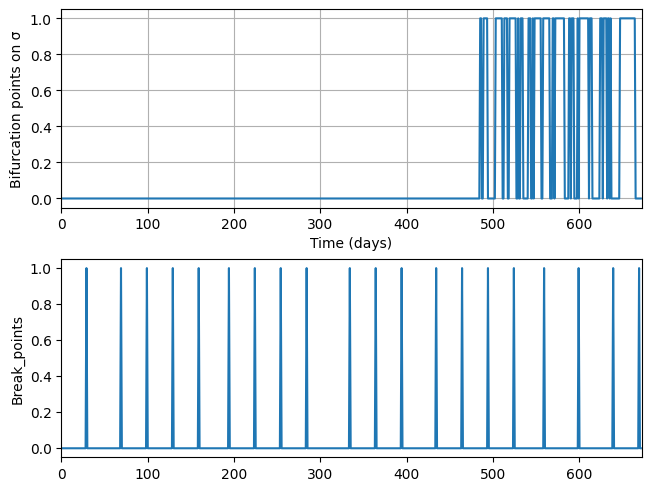

In [41]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, len(bif_data))

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, bif_data)
axs[0].set_xlim(0, len(bif_data))
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Bifurcation points on σ')
axs[0].grid(True)

axs[1].plot(t, break_data)
axs[1].set_ylabel('Break_points')
axs[1].set_xlim(0, len(bif_data))

plt.show()

In [29]:
bif_count = len(bif_indexes)
break_count = len(break_points)
precision = 0
recall_set = set()
recall = 0
f = 0

for idx in bif_indexes:
        for j in range(len(break_points)):
            if break_points[j] >= idx and break_points[j] <= idx + 5:
                precision += 1
                recall_set.add(break_points[j])
                break

recall = len(recall_set) / break_count
precision /= bif_count

precision, recall

ZeroDivisionError: division by zero

In [30]:
2 * precision * recall / (recall + precision)

ZeroDivisionError: float division by zero